In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [100]:
points = []
for i in range(10):
    points.append(np.load('points{}.npy'.format(i)))

<IPython.core.display.Javascript object>


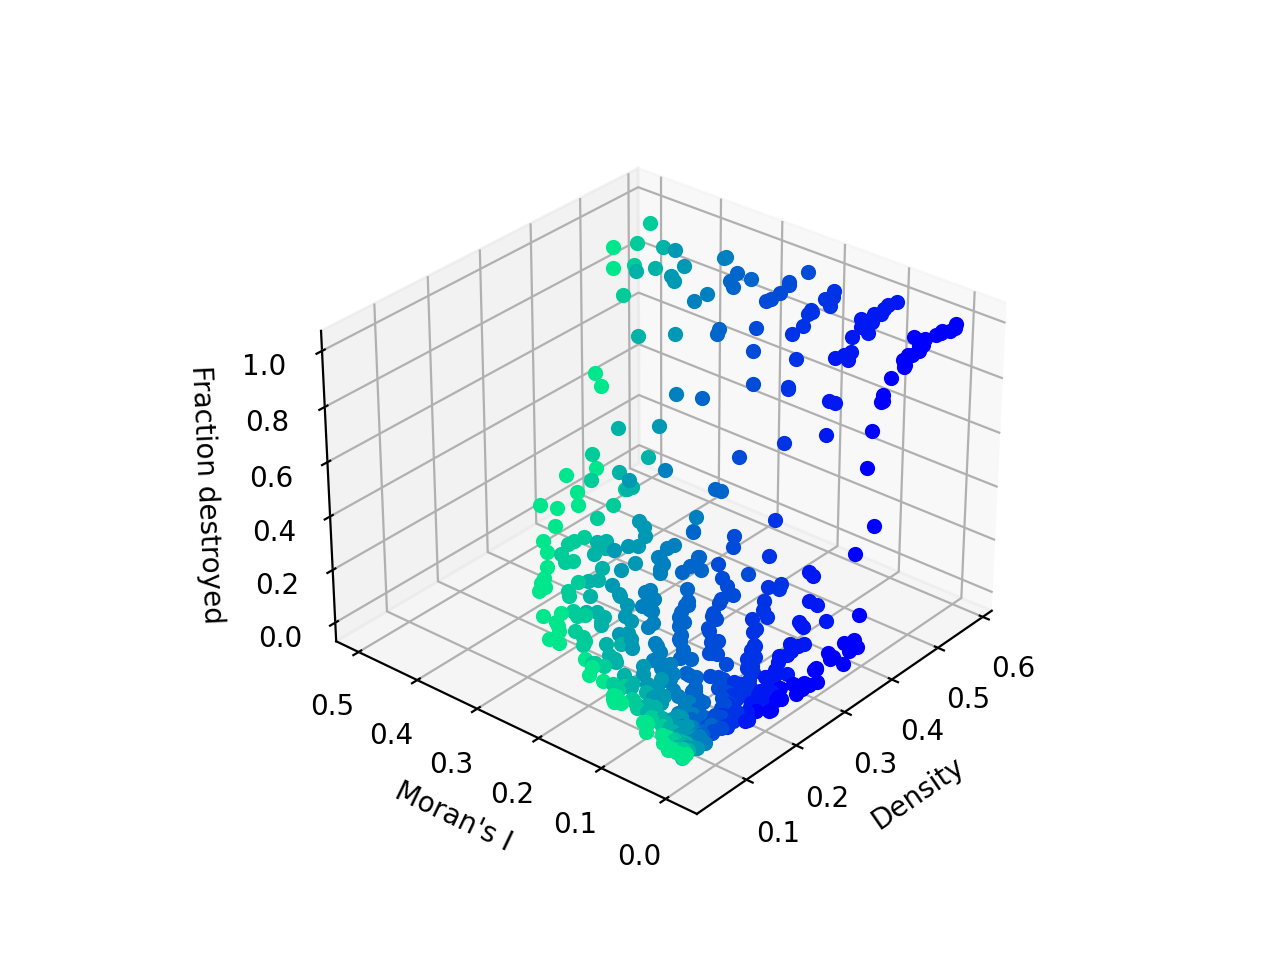

In [116]:
cm = plt.get_cmap('winter') 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i,p in enumerate(points):
    for pp in p:
        ax.scatter(*pp,color=cm(i/len(points)))
ax.set_xlabel('Density')
ax.set_ylabel('Moran\'s I')
ax.set_zlabel('Fraction destroyed')
ax.view_init(elev=30., azim=220.)
plt.savefig('3d.jpg',dpi=300)

<IPython.core.display.Javascript object>


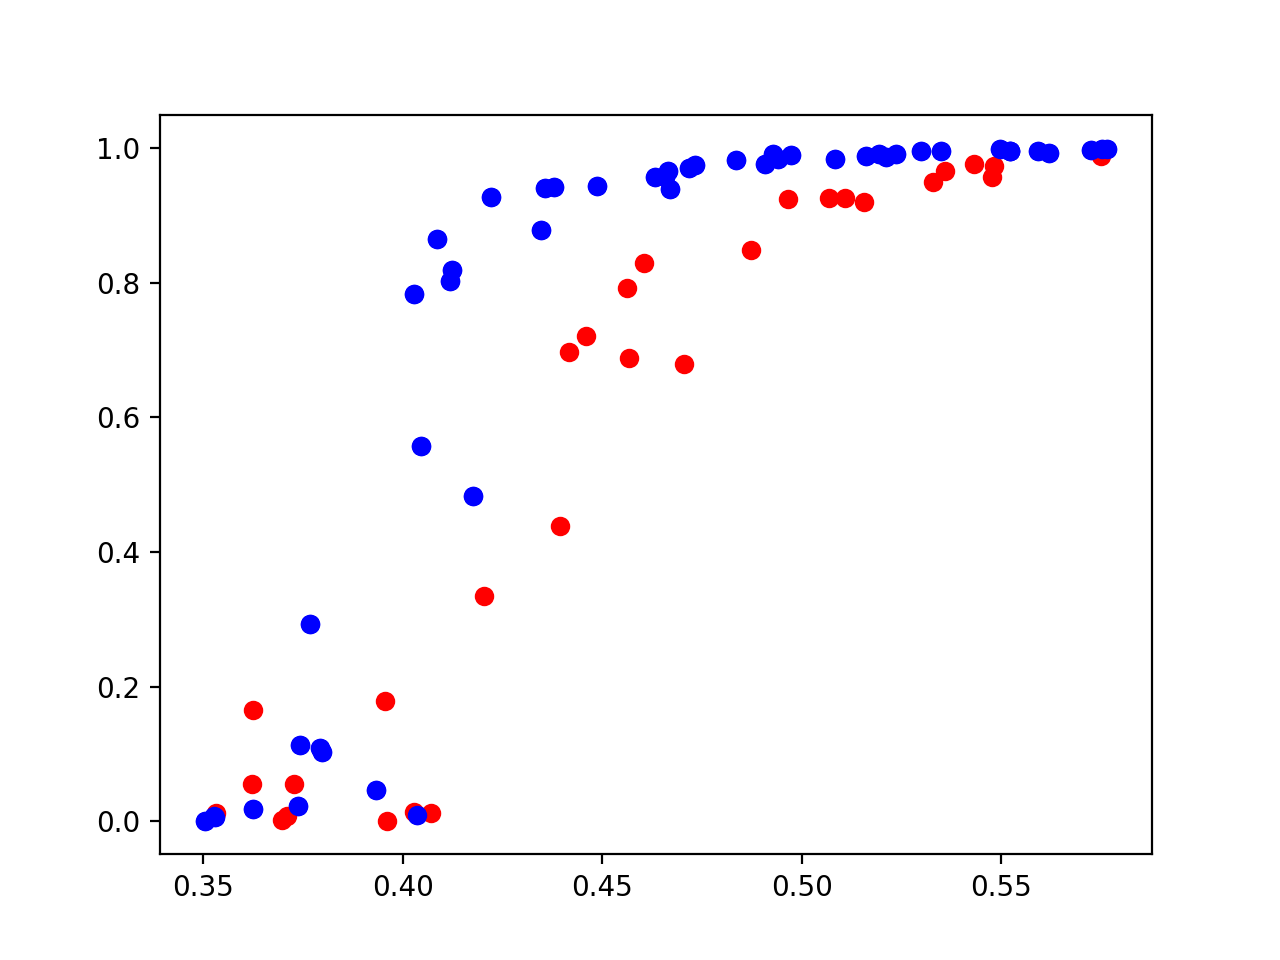

In [40]:
plt.figure()
plt.scatter(points[0][:,0],points[0][:,2],color='blue')
plt.scatter(points[1][:,0],points[1][:,2],color='red')


In [42]:
zero_plot = np.load('points{}.npy'.format(0))

<IPython.core.display.Javascript object>


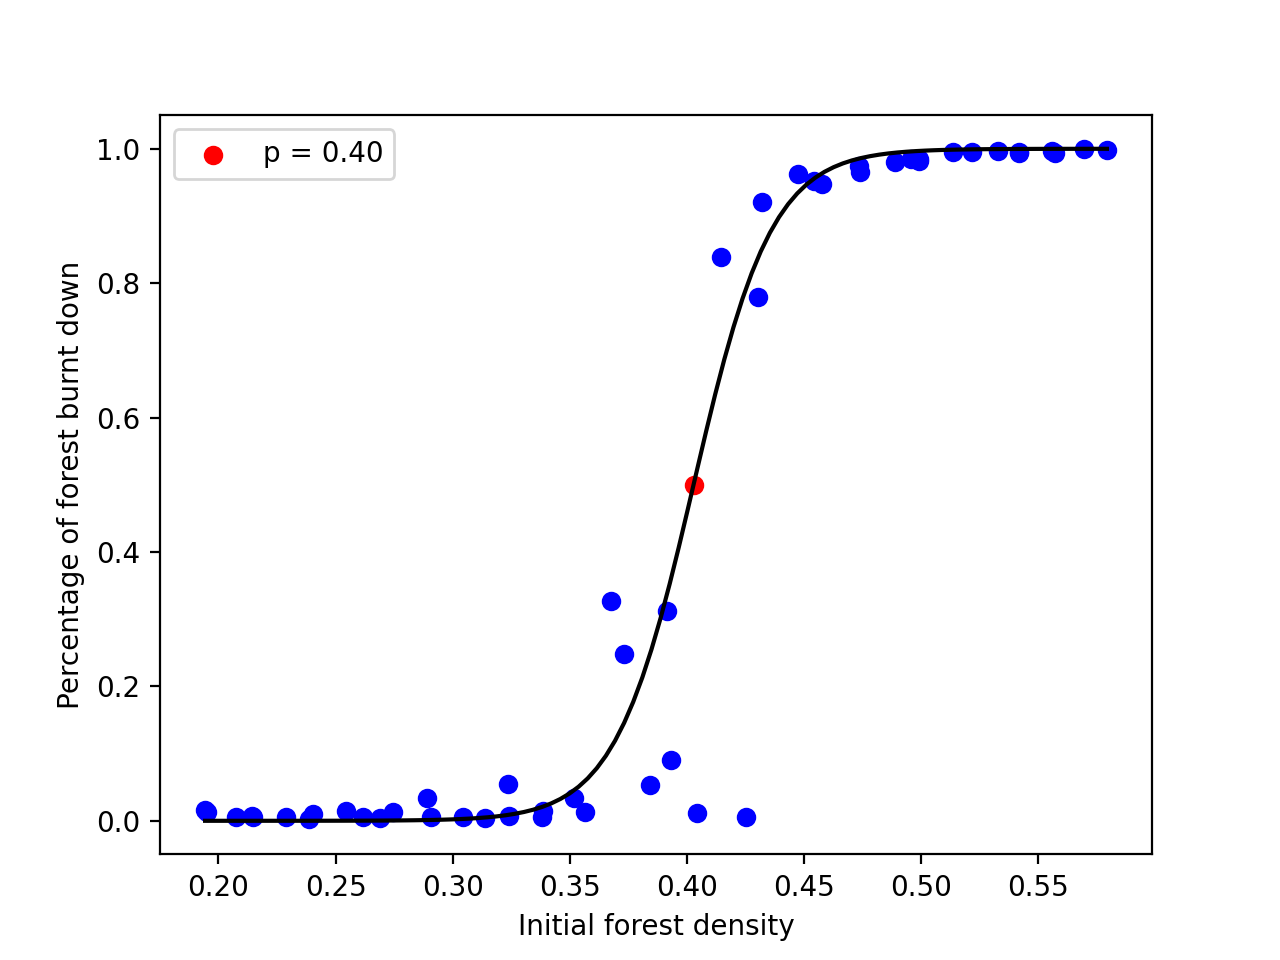

In [144]:
densities = zero_plot[:,0]
percentage_burnt = zero_plot[:,2]
from scipy.optimize import curve_fit
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y

p0 = [np.median(densities), 1] 
popt, pcov = curve_fit(sigmoid, densities, percentage_burnt,p0, method='dogbox')
popt[0] = popt[0]-0.015
x = np.linspace(min(densities),max(densities),100)
plt.figure()

plt.plot(x, sigmoid(x, *popt),color='k')

plt.scatter(densities,percentage_burnt,color='blue')
plt.scatter(popt[0],0.5,color='r',label='p = {:.2f}'.format(popt[0]))

plt.xlabel('Initial forest density')
plt.ylabel('Percentage of forest burnt down')
plt.legend()
plt.savefig('zero.jpg',dpi=300)

<IPython.core.display.Javascript object>


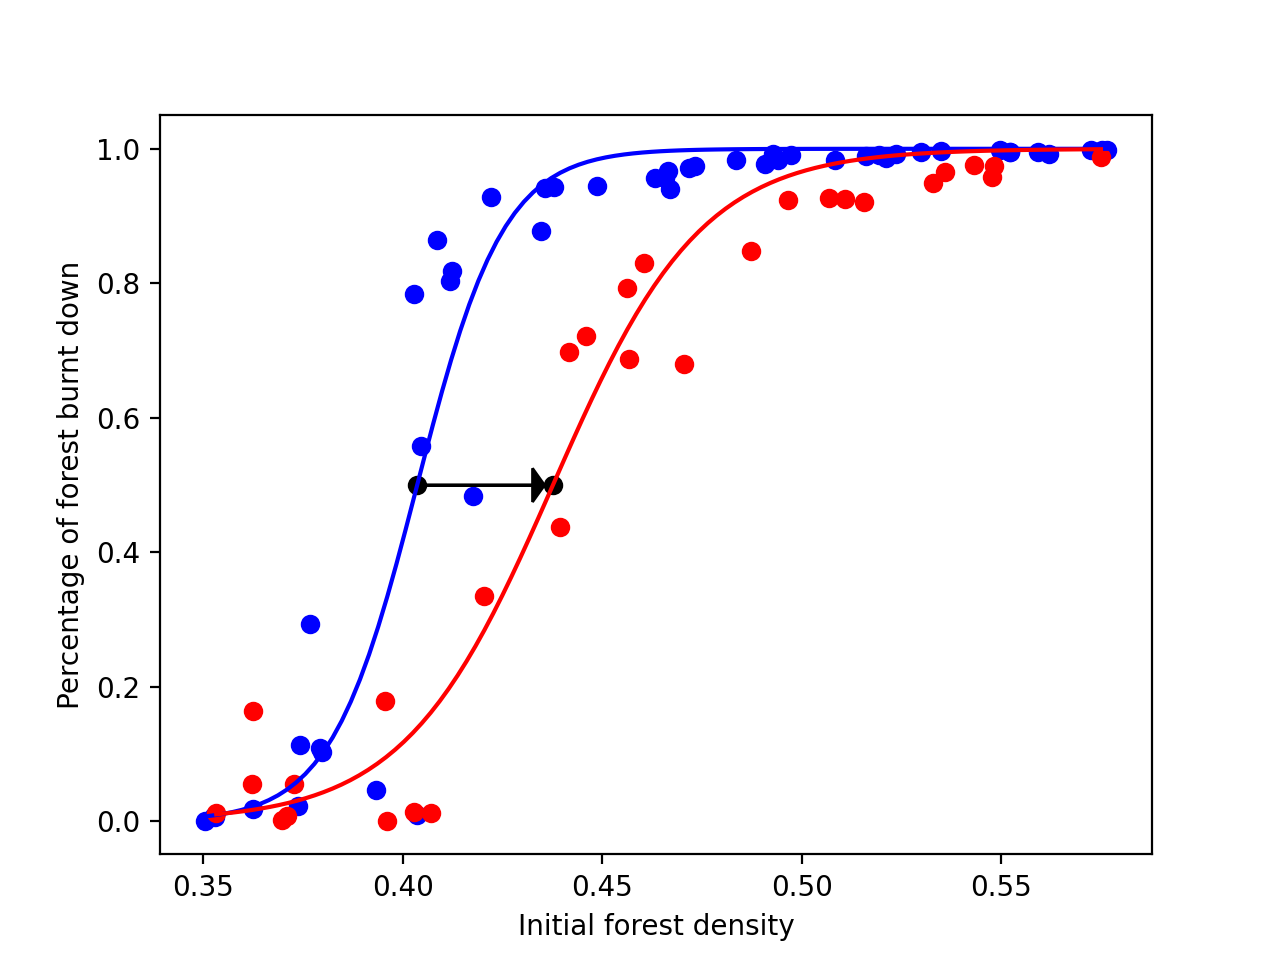

In [97]:
densities = points[0][:,0]
percentage_burnt = points[0][:,2]
from scipy.optimize import curve_fit
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y

p0 = [np.median(densities), 1] 
popt, pcov = curve_fit(sigmoid, densities, percentage_burnt,p0, method='dogbox')
x = np.linspace(min(densities),max(densities),100)
plt.figure()

plt.plot(x, sigmoid(x, *popt),color='blue')

plt.scatter(densities,percentage_burnt,color='blue')
plt.scatter(popt[0],0.5,color='k',label='p = {:.2f}'.format(popt[0]))
arrow_base = popt[0]

densities = points[1][:,0]
percentage_burnt = points[1][:,2]

p0 = [np.median(densities), 1] 
popt, pcov = curve_fit(sigmoid, densities, percentage_burnt,p0, method='dogbox')
x = np.linspace(min(densities),max(densities),100)

plt.plot(x, sigmoid(x, *popt),color='red')

plt.scatter(densities,percentage_burnt,color='red')
plt.scatter(popt[0],0.5,color='k',label='p = {:.2f}'.format(popt[0]))
plt.xlabel('Initial forest density')
plt.ylabel('Percentage of forest burnt down')
plt.arrow(arrow_base,0.5,(popt[0]-arrow_base)*0.85,0,head_width=0.05,head_length=0.003,color='k')
plt.show()
plt.savefig('shift.jpg',dpi=300)

In [133]:
from scipy.optimize import curve_fit
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y

ms = []
dms = []
ps = []
dps = []
for i in range(10):
    densities = points[i][:,0]
    morans = points[i][:,1]
    percentage_burnt = points[i][:,2]
    p0 = [np.median(densities), 1] 
    popt, pcov = curve_fit(sigmoid, densities, percentage_burnt,p0, method='dogbox')
    ps.append(popt[0])
    ms.append(np.mean(morans[np.where(densities>0.35)]))
    dms.append(np.std(morans[np.where(densities>0.35)]))
    dps.append(np.sqrt(pcov[0][0]))

<IPython.core.display.Javascript object>


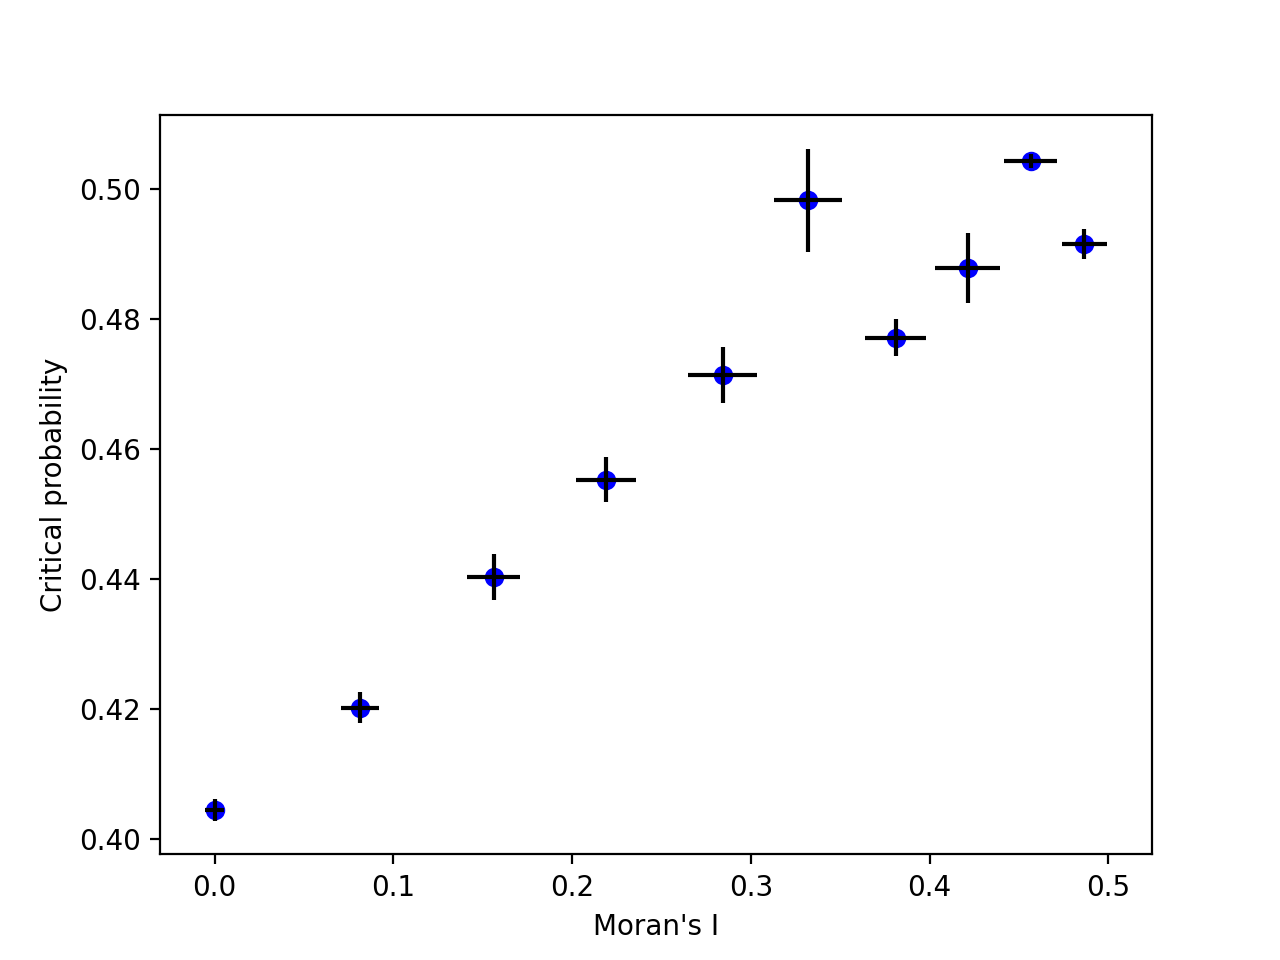

In [137]:
plt.figure()
plt.scatter(ms,ps,color='blue')
plt.errorbar(ms,ps,xerr=dms,yerr=dps,ls='',color='k')
plt.xlabel('Moran\'s I')
plt.ylabel('Critical probability')
plt.savefig('critprobs.jpg',dpi=300)

In [83]:
p_c = [0.4,0.44,0.48,0.5]
m = []
m_e = []
for p in points:
    m.append(np.mean(p[:,1]))
    m_e.append(np.std(p[:,1]))

<IPython.core.display.Javascript object>


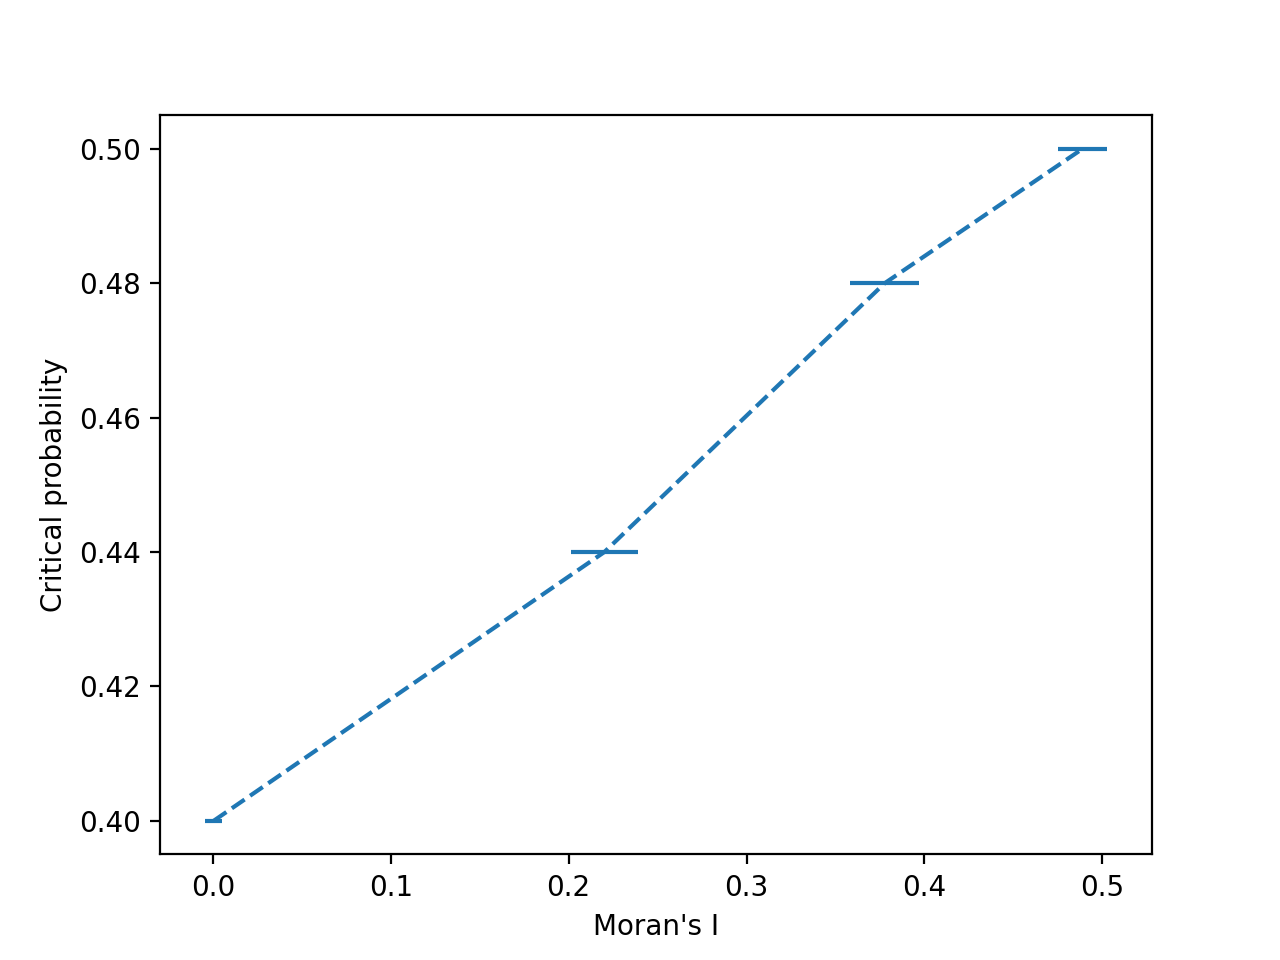

Text(0, 0.5, 'Critical probability')

In [77]:
plt.figure()
plt.errorbar(m[:4],p_c,xerr=m_e[:4],ls='--')
plt.xlabel('Moran\'s I')
plt.ylabel('Critical probability')